In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\carData.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
## Checking for null values

In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [10]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [24]:
print(df['fuel'].value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


In [25]:
print(df['seller_type'].value_counts())

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64


In [26]:
print(df['transmission'].value_counts())

Manual       3892
Automatic     448
Name: transmission, dtype: int64


In [27]:
fuel = df['fuel']
seller_type = df['seller_type']
transmission = df['transmission']
selling_price = df['selling_price']

In [34]:
from matplotlib import style

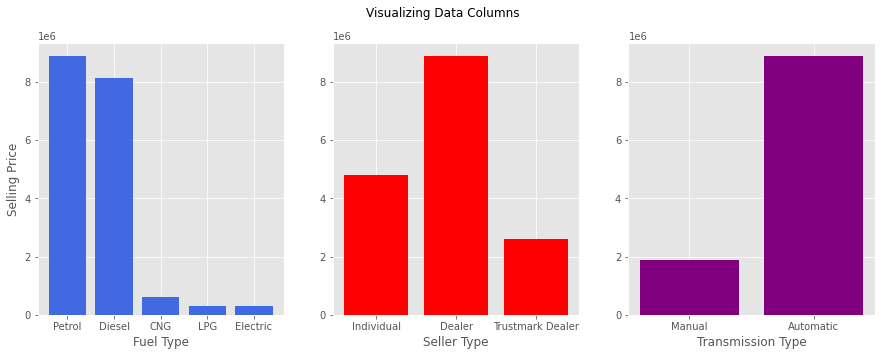

In [41]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing Data Columns')
plt.subplot(1,3,1)
plt.bar(fuel, selling_price, color = 'royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color= 'red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission, selling_price, color = 'purple')
plt.xlabel('Transmission Type')

plt.show()

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

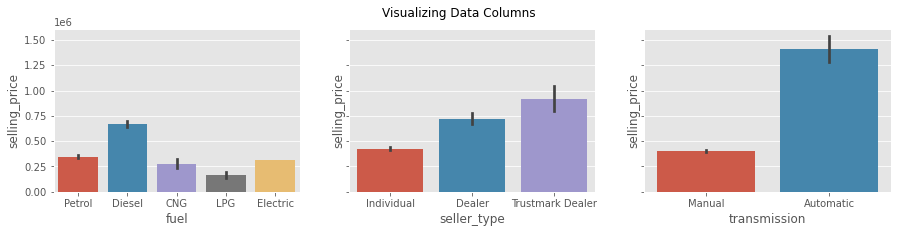

In [40]:
fig, axes = plt.subplots(1,3,figsize=(15,3), sharey=True)
fig.suptitle('Visualizing Data Columns')
sns.barplot(x=fuel, y=selling_price, ax= axes[0])
sns.barplot(x= seller_type, y= selling_price, ax= axes[1])
sns.barplot(x= transmission, y= selling_price, ax= axes[2])

In [42]:
petrol_data = df.groupby('fuel').get_group('Petrol')
petrol_data.describe()

,year,selling_price,km_driven
count,2123.000000,2.123000e+03,2123.000000
mean,2012.595855,3.448401e+05,52340.079604
std,4.847011,3.636728e+05,38109.196219
min,1992.000000,2.000000e+04,101.000000
25%,2009.000000,1.500000e+05,25000.000000
50%,2014.000000,2.690000e+05,50000.000000
75%,2017.000000,4.500000e+05,70000.000000
max,2020.000000,8.900000e+06,806599.000000
